# Preamble


In [2]:
%load_ext autoreload
%autoreload 2
%aimport
# %reload_ext autoreload

import sys 
from os.path import abspath
path = abspath('..')
if path not in sys.path: 
    sys.path.insert(0, path)
print(path)

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Modules to reload:
all-except-skipped

Modules to skip:

/home/imendoza/alcca/nbody-relaxed


In [3]:
from astropy.table import Table, Column

In [5]:
from relaxed import utils
from relaxed.frames import params, catalogs
from relaxed.subhalos import subhalo

from pminh import minh

In [6]:
cat_filepath = Path('/home/imendoza/alcca/nbody-relaxed/data/phils_catalogues/'
                    'halo_catalogues/Bolshoi/BolshoiP/minh/hlist_1.00000.minh')
name = 'BolshoiP'

# try minh

In [7]:
mcat = minh.open(cat_filepath)

In [8]:
print(mcat.names)

['scale', 'id', 'desc_scale', 'desc_id', 'num_prog', 'pid', 'upid', 'desc_pid', 'phantom', 'sam_mvir', 'mvir', 'rvir', 'rs', 'vrms', 'mmp?', 'scale_of_last_mm', 'vmax', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'jx', 'jy', 'jz', 'spin', 'breadth_first_id', 'depth_first_id', 'tree_root_id', 'orig_halo_id', 'snap_num', 'next_coprogenitor_depthfirst_id', 'last_progenitor_depthfirst_id', 'last_mainleaf_depthfirst_id', 'rs_klypin', 'mvir_all', 'm200b', 'm200c', 'm500c', 'm2500c', 'xoff', 'voff', 'spin_bullock', 'b_to_a', 'c_to_a', 'ax', 'ay', 'az', 'b_to_a(500c)', 'c_to_a(500c)', 'ax(500c)', 'ay(500c)', 'az(500c)', 't/|u|', 'm_pe_behroozi', 'm_pe_diemer', 'macc', 'mpeak', 'vacc', 'vpeak', 'halfmass_scale', 'gamma_inst', 'gamma_100myr', 'gamma_tdyn', 'gamma_2tdyn', 'gamma_mpeak', 'mpeak_scale', 'acc_scale', 'first_acc_scale', 'first_acc_mvir', 'first_acc_vmax', 'vmax@mpeak']


In [9]:
t = Table(mcat.read(('id', 'mvir')), names=['id', 'mvir'])

In [80]:
mcat.read([])

[]

# try hcat 

In [10]:
hcat = catalogs.HaloCatalog(cat_filepath, name, verbose=True)

In [11]:
hcat.load_base_cat()

/home/imendoza/alcca/nbody-relaxed/relaxed/frames/catalogs.py:158: UserWarning: Ignoring dividing by zero and invalid errors that should be filtered out anyways.
  "Ignoring dividing by zero and invalid errors that should "


0


/home/imendoza/alcca/nbody-relaxed/relaxed/frames/catalogs.py:195: UserWarning: We only include parameters in `params.default_params_to_include`
  warnings.warn("We only include parameters in `params.default_params_to_include`")


In [14]:
hcat._cat.sort('id')

In [16]:
hcat._cat

id,mvir,rvir,rs,xoff,voff,vrms,gamma_tdyn,gamma_inst,t/|u|,spin,scale_of_last_mm,cvir,eta,q,phi_l,x0,v0,f_sub,upid
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64
2809249530,605600000000.0,171.988,12.556,3.01218,3.28,145.46,11.86,-20.14,0.5026,0.06796,0.7897,13.697675,1.0052,0.742085,1.695625,0.017513895,0.022549152,-1,-1
2809249552,167500000000.0,112.061,5.351,5.30413,3.12,90.45,-114.8,-45.78,0.4498,0.04938,0.2531,20.942066,0.8996,0.797215,2.3522663,0.047332525,0.034494195,-1,-1
2809249662,455600000000.0,156.421,3.647,1.57164,8.73,164.64,1.748,-22.89,0.5798,0.0323,0.9719,42.89032,1.1596,0.97353005,1.0574012,0.0100475,0.05302478,-1,-1
2809249670,225200000000.0,123.671,5.023,2.52312,5.01,110.27,3.6,9.155,0.5096,0.04036,0.1822,24.620945,1.0192,0.83640003,1.3845235,0.020401873,0.04543394,-1,-1
2809249768,1548000000000.0,235.171,17.784,23.909,11.58,216.61,-163.5,-347.9,0.62,0.05958,0.9036,13.223741,1.24,0.74376,1.3217182,0.10166644,0.053460136,-1,-1
2809249770,502700000000.0,161.637,11.573,7.16488,17.29,143.66,-27.84,0.9155,0.5622,0.02313,0.2328,13.966732,1.1244,0.754785,1.1819297,0.04432698,0.12035362,-1,-1
2809249815,164000000000.0,111.261,2.258,3.53559,2.33,112.27,-41.16,-21.06,0.5302,0.03618,0.896,49.27414,1.0604,0.81228,1.1695282,0.03177744,0.02075354,-1,-1
2809249821,221000000000.0,122.901,1.721,1.97347,3.64,129.9,-18.0,-3.662,0.4994,0.01156,0.2277,71.41255,0.9988,0.842015,1.2960479,0.016057396,0.028021557,-1,-1
2809249873,193500000000.0,117.589,5.884,3.65844,9.31,106.02,-7.384,-16.48,0.5376,0.04352,0.2733,19.984535,1.0752,0.827345,1.1903853,0.031112095,0.08781362,-1,-1


In [12]:
assert np.all(hcat._cat['upid']==-1)
assert np.all(hcat._cat['mvir']>=np.log10(hcat.particle_mass * 1e3))
print(len(hcat))

349104


# try subhalos 

## test

In [39]:
from relaxed.subhalos import subhalo

In [47]:
host_ids = np.array([100, 200, 50, -17], dtype=int)
sub_pids = np.array([100, -17, 100, 200, -17, 100, 75, 300, -20], dtype=int)
sub_mvir = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=float)

In [49]:
order = np.argsort(host_ids)
host_ids = host_ids[order]

In [50]:
host_ids

array([-17,  50, 100, 200])

In [51]:
sub_index = np.searchsorted(host_ids, sub_pids)

In [52]:
sub_index

array([2, 0, 2, 3, 0, 2, 2, 4, 0])

In [55]:
sub_ok = sub_index < len(host_ids)
sub_ok

array([ True,  True,  True,  True,  True,  True,  True, False,  True])

In [43]:
sub_ok[sub_ok] &= host_ids[sub_index[sub_ok]] == sub_pids[sub_ok]

out = np.ones(len(sub_index), dtype=int) * -1
out[sub_ok] = self.host_index[sub_index[sub_ok]]

[array([0, 2, 5]), array([3]), array([], dtype=int64), array([1, 4])]

In [44]:
subhalo.m_sub(host_ids, sub_pids, sub_mvir)

array([10.,  4.,  0.,  7.])

## my cat 

In [ ]:
hcat = catalogs.HaloCatalog(cat_filepath, name, verbose=True, extract_sub=True)

In [ ]:
hcat.load_base_cat()

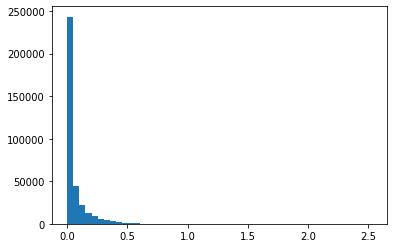

In [79]:
plt.hist(hcat._cat['f_sub'][:-2],bins=50);

In [88]:
cat = hcat._cat
host_ids = cat['id']
ids, upid, mvir = mcat.block(0, ['id','upid', 'mvir'])
ids = ids[upid!=-1]
sub_pids = upid[upid != -1]
sub_mvir = mvir[upid != -1]

In [92]:
set(host_ids)

[autoreload of relaxed.frames.catalogs failed: Traceback (most recent call last):
  File "/home/imendoza/miniconda3/envs/alcca/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/imendoza/miniconda3/envs/alcca/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/imendoza/miniconda3/envs/alcca/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/imendoza/miniconda3/envs/alcca/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/home/imendoza/miniconda3/envs/alcca/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 312, in update_instances
    update_instances(old, new, obj.__dict__, visited)
  File "/home/imendoza/miniconda3/envs/alcca/lib/python3.7/site-pa

{2813329428,
 2810183712,
 2810183717,
 2810183737,
 2810183754,
 2813329483,
 2813329503,
 2813329510,
 2814378086,
 2813329514,
 2814378092,
 2813329529,
 2813329534,
 2813329542,
 2813329547,
 2813329552,
 2813329559,
 2813329563,
 2814378146,
 2813329582,
 2813329584,
 2817523910,
 2814378214,
 2810183941,
 2817523982,
 2810183974,
 2810183990,
 2814378298,
 2813329732,
 2813329735,
 2814378314,
 2817524046,
 2814378337,
 2817524068,
 2817524107,
 2817524108,
 2813329821,
 2814378413,
 2813329846,
 2817524156,
 2813329861,
 2813329863,
 2817524177,
 2810184146,
 2810184162,
 2814378475,
 2810184186,
 2810184198,
 2810184210,
 2810184223,
 2810184239,
 2810184243,
 2810184256,
 2810184263,
 2810184265,
 2810184284,
 2810184293,
 2817524329,
 2817524335,
 2810184305,
 2814378614,
 2810184316,
 2814378624,
 2810184325,
 2810184330,
 2813330067,
 2810184340,
 2810184343,
 2810184348,
 2810184351,
 2810184353,
 2810184370,
 2814378679,
 2813330104,
 2810184382,
 2817524417,
 2810184391,

In [57]:
len(sub_pids)

608961

In [58]:
table = subhalo.LookupTable(host_ids)
table.lookup(sub_pids)

array([    20,     11,   3053, ..., 238796, 238796, 238904])

In [59]:
max(host_ids)

2821926511

In [60]:
max(sub_pids)

2821893173